In [2]:
import os
os.chdir('/home/jagust/dino/surf')
from surf import *
% matplotlib inline

In [3]:
matches = np.load('/home/jagust/dino/surf/matches.npy')
order = np.load('/home/jagust/dino/surf/simulation_trials/order_or_removals.npy')

In [4]:
def find_subsess(s):
    ''' Given a path or string, finds the subuject's subsession'''

    inds = re.search('B[0,1,9]\d-\d\d\d_\d\d\d\d-\d\d-\d\d', s)
    if inds is None:
        print 'Subject ID not found'
        return None
    else:
        inds = inds.span()
        return s[inds[0]: inds[1]]

def dampen(g, nodes, cost = 0.5):
    for node in nodes:
        for edge in g.edges(node, data=True):
            edge[2]['weight'] *= cost
    add_distance_attr(g)
    
def run_simulation(fnet, order):
    sp, mod = [], []
    removed = set([])
    for rem in order:
        removed.add(rem)
        dampen(fnet, removed, 0.50)
        # Efficiency
        sp.append(1.0 / nx.average_shortest_path_length(fnet, weight='distance'))
        
        # Modularity
        l = wmd.LouvainCommunityDetection(fnet)
        p = l.run()
        mod.append(p[-1].modularity())
    return sp, mod

def load_graph(path):
    if type(path) == str or type(path) == unicode:
        g = nx.Graph(np.load(path))
        add_distance_attr(g)
    else:
        g = nx.Graph(path)
        add_distance_attr(g)
    return g

def find_modularity(fnet):
    l = wmd.LouvainCommunityDetection(fnet)
    p = l.run()
    return p[-1].modularity()

Analysis
==

In [5]:
results_dir = '/home/jagust/dino/surf/simulation_trials/ignore_pib_pos/dampening/percent75/*.npy'
results = sorted(glob(results_dir))

array([[ 1.20501571,  1.2028256 ,  1.19939969,  1.19573346,  1.19160304,
         1.18654477,  1.18168375,  1.17694758,  1.17234811,  1.16778517,
         1.16307003,  1.15822069,  1.15293005,  1.14782338,  1.14290474,
         1.13767411,  1.13270107,  1.12797589,  1.12324688,  1.1184776 ,
         1.11372653,  1.10968809,  1.10594036,  1.10245718,  1.09931123,
         1.09577977,  1.09170276,  1.08779135,  1.08388818,  1.08043102,
         1.07723503,  1.0741755 ,  1.0707571 ,  1.06718898,  1.06383737,
         1.06060527,  1.05758372,  1.05433574,  1.05136386,  1.04863809,
         1.04613216,  1.04390573,  1.04167107,  1.03942475,  1.03701642,
         1.03456013,  1.03237773,  1.03009385,  1.0279295 ,  1.02609231,
         1.0242777 ,  1.02266174,  1.021166  ,  1.01956012,  1.01818155,
         1.01675966,  1.01547576,  1.01426658,  1.01315484,  1.01201144,
         1.01081408,  1.00972331,  1.00867946,  1.0076798 ,  1.00671548,
         1.00587307,  1.00513248,  1.00438378,  1.0

# Dampening rounds: 0
E4 Positive: 1.24231605805+/- 0.0566054412041
E4 Negative: 1.24173370908+/- 0.0398103358312


# Dampening rounds: 5
E4 Positive: 1.21783303271+/- 0.0504357204147
E4 Negative: 1.21596526721+/- 0.0336273173613


# Dampening rounds: 10
E4 Positive: 1.18822694433+/- 0.0421461450763
E4 Negative: 1.18615659407+/- 0.0270246929914


# Dampening rounds: 15
E4 Positive: 1.15947713651+/- 0.0344459379816
E4 Negative: 1.15748015534+/- 0.0221551415755


# Dampening rounds: 20
E4 Positive: 1.13316143449+/- 0.0283892276063
E4 Negative: 1.13161524185+/- 0.0188763643998


# Dampening rounds: 25
E4 Positive: 1.11101075567+/- 0.0234027978719
E4 Negative: 1.10940695876+/- 0.0155861663897


# Dampening rounds: 30
E4 Positive: 1.09080079917+/- 0.0194940564378
E4 Negative: 1.08894972305+/- 0.012530948119


# Dampening rounds: 35
E4 Positive: 1.07197498317+/- 0.0158913897448
E4 Negative: 1.07063501856+/- 0.0101260448567


# Dampening rounds: 40
E4 Positive: 1.05560550207+/- 0.012898710288

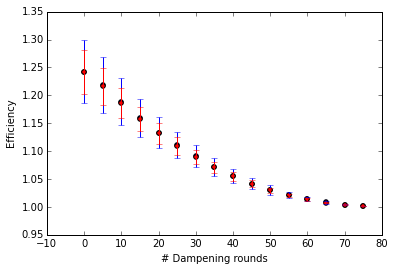

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
checks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
pos_checks, neg_checks = {}, {}
for check in checks:
    pos_checks[check] = []
    neg_checks[check] = []

plt.ylabel('Efficiency')
plt.xlabel('# Dampening rounds')
for res in results:
    r = np.load(res)[0]
    if is_geno_pos(find_id(res)):
        for check in checks:
            pos_checks[check].append(r[check])
    if is_geno_neg(find_id(res)):
        for check in checks:
            neg_checks[check].append(r[check])
for check in checks:
    print "# Dampening rounds: " + str(check)
    print "E4 Positive: " + str(np.mean(pos_checks[check])) + "+/- " + str(np.std(pos_checks[check]))
    plt.scatter(check, np.mean(pos_checks[check]), c = 'b')
    plt.errorbar(check, np.mean(pos_checks[check]), yerr = np.std(pos_checks[check]), c = 'b')
    print "E4 Negative: " + str(np.mean(neg_checks[check])) + "+/- " + str(np.std(neg_checks[check]))
    plt.scatter(check, np.mean(neg_checks[check]), c = 'r')
    plt.errorbar(check, np.mean(neg_checks[check]), yerr = np.std(neg_checks[check]), c = 'r')
    print ""
    print ""

# Dampening rounds: 0
E4 Positive: 0.186586119329+/- 0.0145580613607
E4 Negative: 0.184859936979+/- 0.0147334856468


# Dampening rounds: 5
E4 Positive: 0.190175290474+/- 0.0160662816854
E4 Negative: 0.187964081291+/- 0.0150593047795


# Dampening rounds: 10
E4 Positive: 0.195034923824+/- 0.016999001604
E4 Negative: 0.194014855466+/- 0.0134707581966


# Dampening rounds: 15
E4 Positive: 0.200660485868+/- 0.0180788576171
E4 Negative: 0.201996478685+/- 0.0148627949501


# Dampening rounds: 20
E4 Positive: 0.208047880917+/- 0.0194062595109
E4 Negative: 0.208789311335+/- 0.0151427961321


# Dampening rounds: 25
E4 Positive: 0.214602457219+/- 0.021573832938
E4 Negative: 0.215779612102+/- 0.0175522433729


# Dampening rounds: 30
E4 Positive: 0.224484079129+/- 0.024845722834
E4 Negative: 0.226834874156+/- 0.017248957225


# Dampening rounds: 35
E4 Positive: 0.236801908524+/- 0.0273070735083
E4 Negative: 0.238400785325+/- 0.0178928524534


# Dampening rounds: 40
E4 Positive: 0.252461742425+/- 

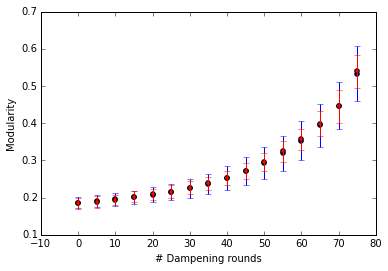

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
checks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
pos_checks, neg_checks = {}, {}
for check in checks:
    pos_checks[check] = []
    neg_checks[check] = []

plt.ylabel('Modularity')
plt.xlabel('# Dampening rounds')
for res in results:
    r = np.load(res)[1]
    if is_geno_pos(find_id(res)):
        for check in checks:
            pos_checks[check].append(r[check])
    if is_geno_neg(find_id(res)):
        for check in checks:
            neg_checks[check].append(r[check])
for check in checks:
    print "# Dampening rounds: " + str(check)
    print "E4 Positive: " + str(np.mean(pos_checks[check])) + "+/- " + str(np.std(pos_checks[check]))
    plt.scatter(check, np.mean(pos_checks[check]), c = 'b')
    plt.errorbar(check, np.mean(pos_checks[check]), yerr = np.std(pos_checks[check]), c = 'b')
    print "E4 Negative: " + str(np.mean(neg_checks[check])) + "+/- " + str(np.std(neg_checks[check]))
    plt.scatter(check, np.mean(neg_checks[check]), c = 'r')
    plt.errorbar(check, np.mean(neg_checks[check]), yerr = np.std(neg_checks[check]), c = 'r')
    print ""
    print ""

E4+     r: (0.12927870406827593, 0.54713463833334064)
E4-     r: (-0.11169296330272731, 0.60334122822326441)


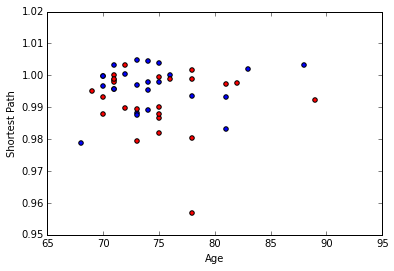

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(pos_age, pos_met, c = 'b')
ax.scatter(neg_age, neg_met, c = 'r')
plt.ylabel('Shortest Path')
plt.xlabel('Age')
rp, rn = stats.pearsonr(pos_age, pos_met), stats.pearsonr(neg_age, neg_met)
print "E4+     r: " + str(rp)
print "E4-     r: " + str(rn)

E4+     r: (0.109103379463706, 0.61181721061852246)
E4-     r: (0.10049586748319971, 0.64033472137171565)


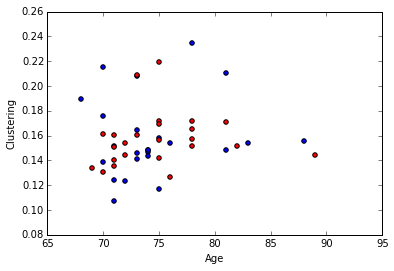

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(pos_age, pos_met, c = 'b')
ax.scatter(neg_age, neg_met, c = 'r')
plt.ylabel('Clustering')
plt.xlabel('Age')
rp, rn = stats.pearsonr(pos_age, pos_met), stats.pearsonr(neg_age, neg_met)
print "E4+     r: " + str(rp)
print "E4-     r: " + str(rn)

E4+     r: (0.10527424122509284, 0.62443920142711828)
E4-     r: (0.090845467070606811, 0.67290349722358367)


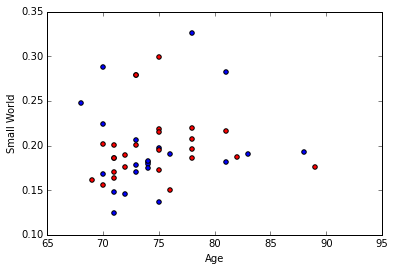

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(pos_age, pos_met, c = 'b')
ax.scatter(neg_age, neg_met, c = 'r')
plt.ylabel('Small World')
plt.xlabel('Age')
rp, rn = stats.pearsonr(pos_age, pos_met), stats.pearsonr(neg_age, neg_met)
print "E4+     r: " + str(rp)
print "E4-     r: " + str(rn)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(pos_age, pos_met, c = 'b')
ax.scatter(neg_age, neg_met, c = 'r')
plt.ylabel('Modularity')
plt.xlabel('Age')
rp, rn = stats.pearsonr(pos_age, pos_met), stats.pearsonr(neg_age, neg_met)
print "E4+     r: " + str(rp)
print "E4-     r: " + str(rn)